<a href="https://colab.research.google.com/github/Alimustoofaa/yolov8-custom-dataset/blob/main/YoloV8_Train_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install YoloV8

In [1]:
# Install from github ultralytics
!pip3 install git+https://github.com/ultralytics/ultralytics.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ultralytics/ultralytics.git to /tmp/pip-req-build-wdnb074m
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-wdnb074m
  Resolved https://github.com/ultralytics/ultralytics.git to commit 6eec39162a9f4153d1ce5f71102fdee3d64188ec
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 5.8 MB/s eta 0:00:00
     ━━━

# YoloV8 CLI


YOLOv8 comes with a command line interface that lets you train, validate or infer models on various tasks and versions. The CLI requires no customization or code. You can run all tasks from the terminal. Usage is fairly similar to the scripts we are familiar with. The example below shows how to leverage the CLI to detect objects in a given image.



In [1]:
!yolo task=detect mode=predict model=yolov8n.pt source="https://ultralytics.com/images/bus.jpg"

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
100% 6.24M/6.24M [00:00<00:00, 49.7MB/s]

Fusing... 
YOLOv8n summary: 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 476k/476k [00:00<00:00, 23.4MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 14.0ms
Speed: 0.7ms pre-process, 14.0ms inference, 50.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


# Yolov8 Python SDK


Ultralytics YOLO comes with a pythonic Model and Trainer interface. This finally allows us to use the YOLO model inside a custom Python script in only a few lines of code. Something like this has been impossible until now without doing a repository fork and making your own changes to the code.



In [2]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')
model.predict(
   source='https://media.roboflow.com/notebooks/examples/dog.jpeg',
   conf=0.25
)


  0%|          | 0.00/21.5M [00:00<?, ?B/s]


Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
YOLOv8s summary: 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs


  0%|          | 0.00/104k [00:00<?, ?B/s]

[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Results'> instance
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([4, 6])
 dtype: torch.float32
 original size: (1280, 720)]

# Preparing a custom dataset for YOLOv8


In [3]:
# Download Dataset
!mkdir datasets
!curl -L "https://universe.roboflow.com/ds/Dyz30pdkuT?key=OTFztPFZ0H" > roboflow.zip;
!unzip roboflow.zip -d datasets/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0    488      0  0:00:01  0:00:01 --:--:--   488
100 44.0M  100 44.0M    0     0  16.8M      0  0:00:02  0:00:02 --:--:--  239M
Archive:  roboflow.zip
 extracting: datasets/README.dataset.txt  
 extracting: datasets/README.roboflow.txt  
 extracting: datasets/data.yaml      
   creating: datasets/test/
   creating: datasets/test/images/
 extracting: datasets/test/images/Blast_1043_jpg.rf.ea5f4149790d924ff916ed7e8ec0a9e8.jpg  
 extracting: datasets/test/images/Blast_1057_jpg.rf.36f23153ad05ad2fda3f8247c0e6658d.jpg  
 extracting: datasets/test/images/Blast_1063_jpg.rf.52eca22247ddf9e28f886c94389fb54b.jpg  
 extracting: datasets/test/images/Blast_1100_jpg.rf.bae2cb1acff983b75d0895217aab8190.jpg  
 extracting: datasets/test/images/Blast_1133_jpg.rf.a10767f74e4a5635e87829dc6d6b80a1.jpg  
 extracting: datas

In [4]:
'''
Change directory path dataset
train: /content/datasets/train/images
val: /content/datasets/valid/images
test: /content/datasets/test/images
'''

'\nChange directory path dataset\ntrain: /content/datasets/train/images\nval: /content/datasets/valid/images\ntest: /content/datasets/test/images\n'

# Setup ClearML Logging

In [5]:
!pip install clearml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.5/966.5 KB 20.7 MB/s eta 0:00:00


In [114]:
# setup clearml sdk
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=
%env CLEARML_API_SECRET_KEY=

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=
env: CLEARML_API_SECRET_KEY=


# Start train

In [7]:
!yolo --help

usage: yolo
       [-h]
       args
       [args ...]

YOLO parser

positional arguments:
  args
    YOLO args

optional arguments:
  -h, --help
    show this
    help
    message and
    exit


Using Python

```
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8s.pt") 
# Train the model
results = model.train(data="/content/datasets/data.yaml", epochs=20, imgsz=416)

```



In [16]:
# Using CLI
!yolo task=detect \
    mode=train \
    model=/content/yolov8s.pt \
    data=/content/datasets/data.yaml \
    epochs=20 \
    batch=64 \
    imgsz=416


Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/yolov8s.pt, data=/content/datasets/data.yaml, epochs=20, patience=50, batch=64, imgsz=416, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0

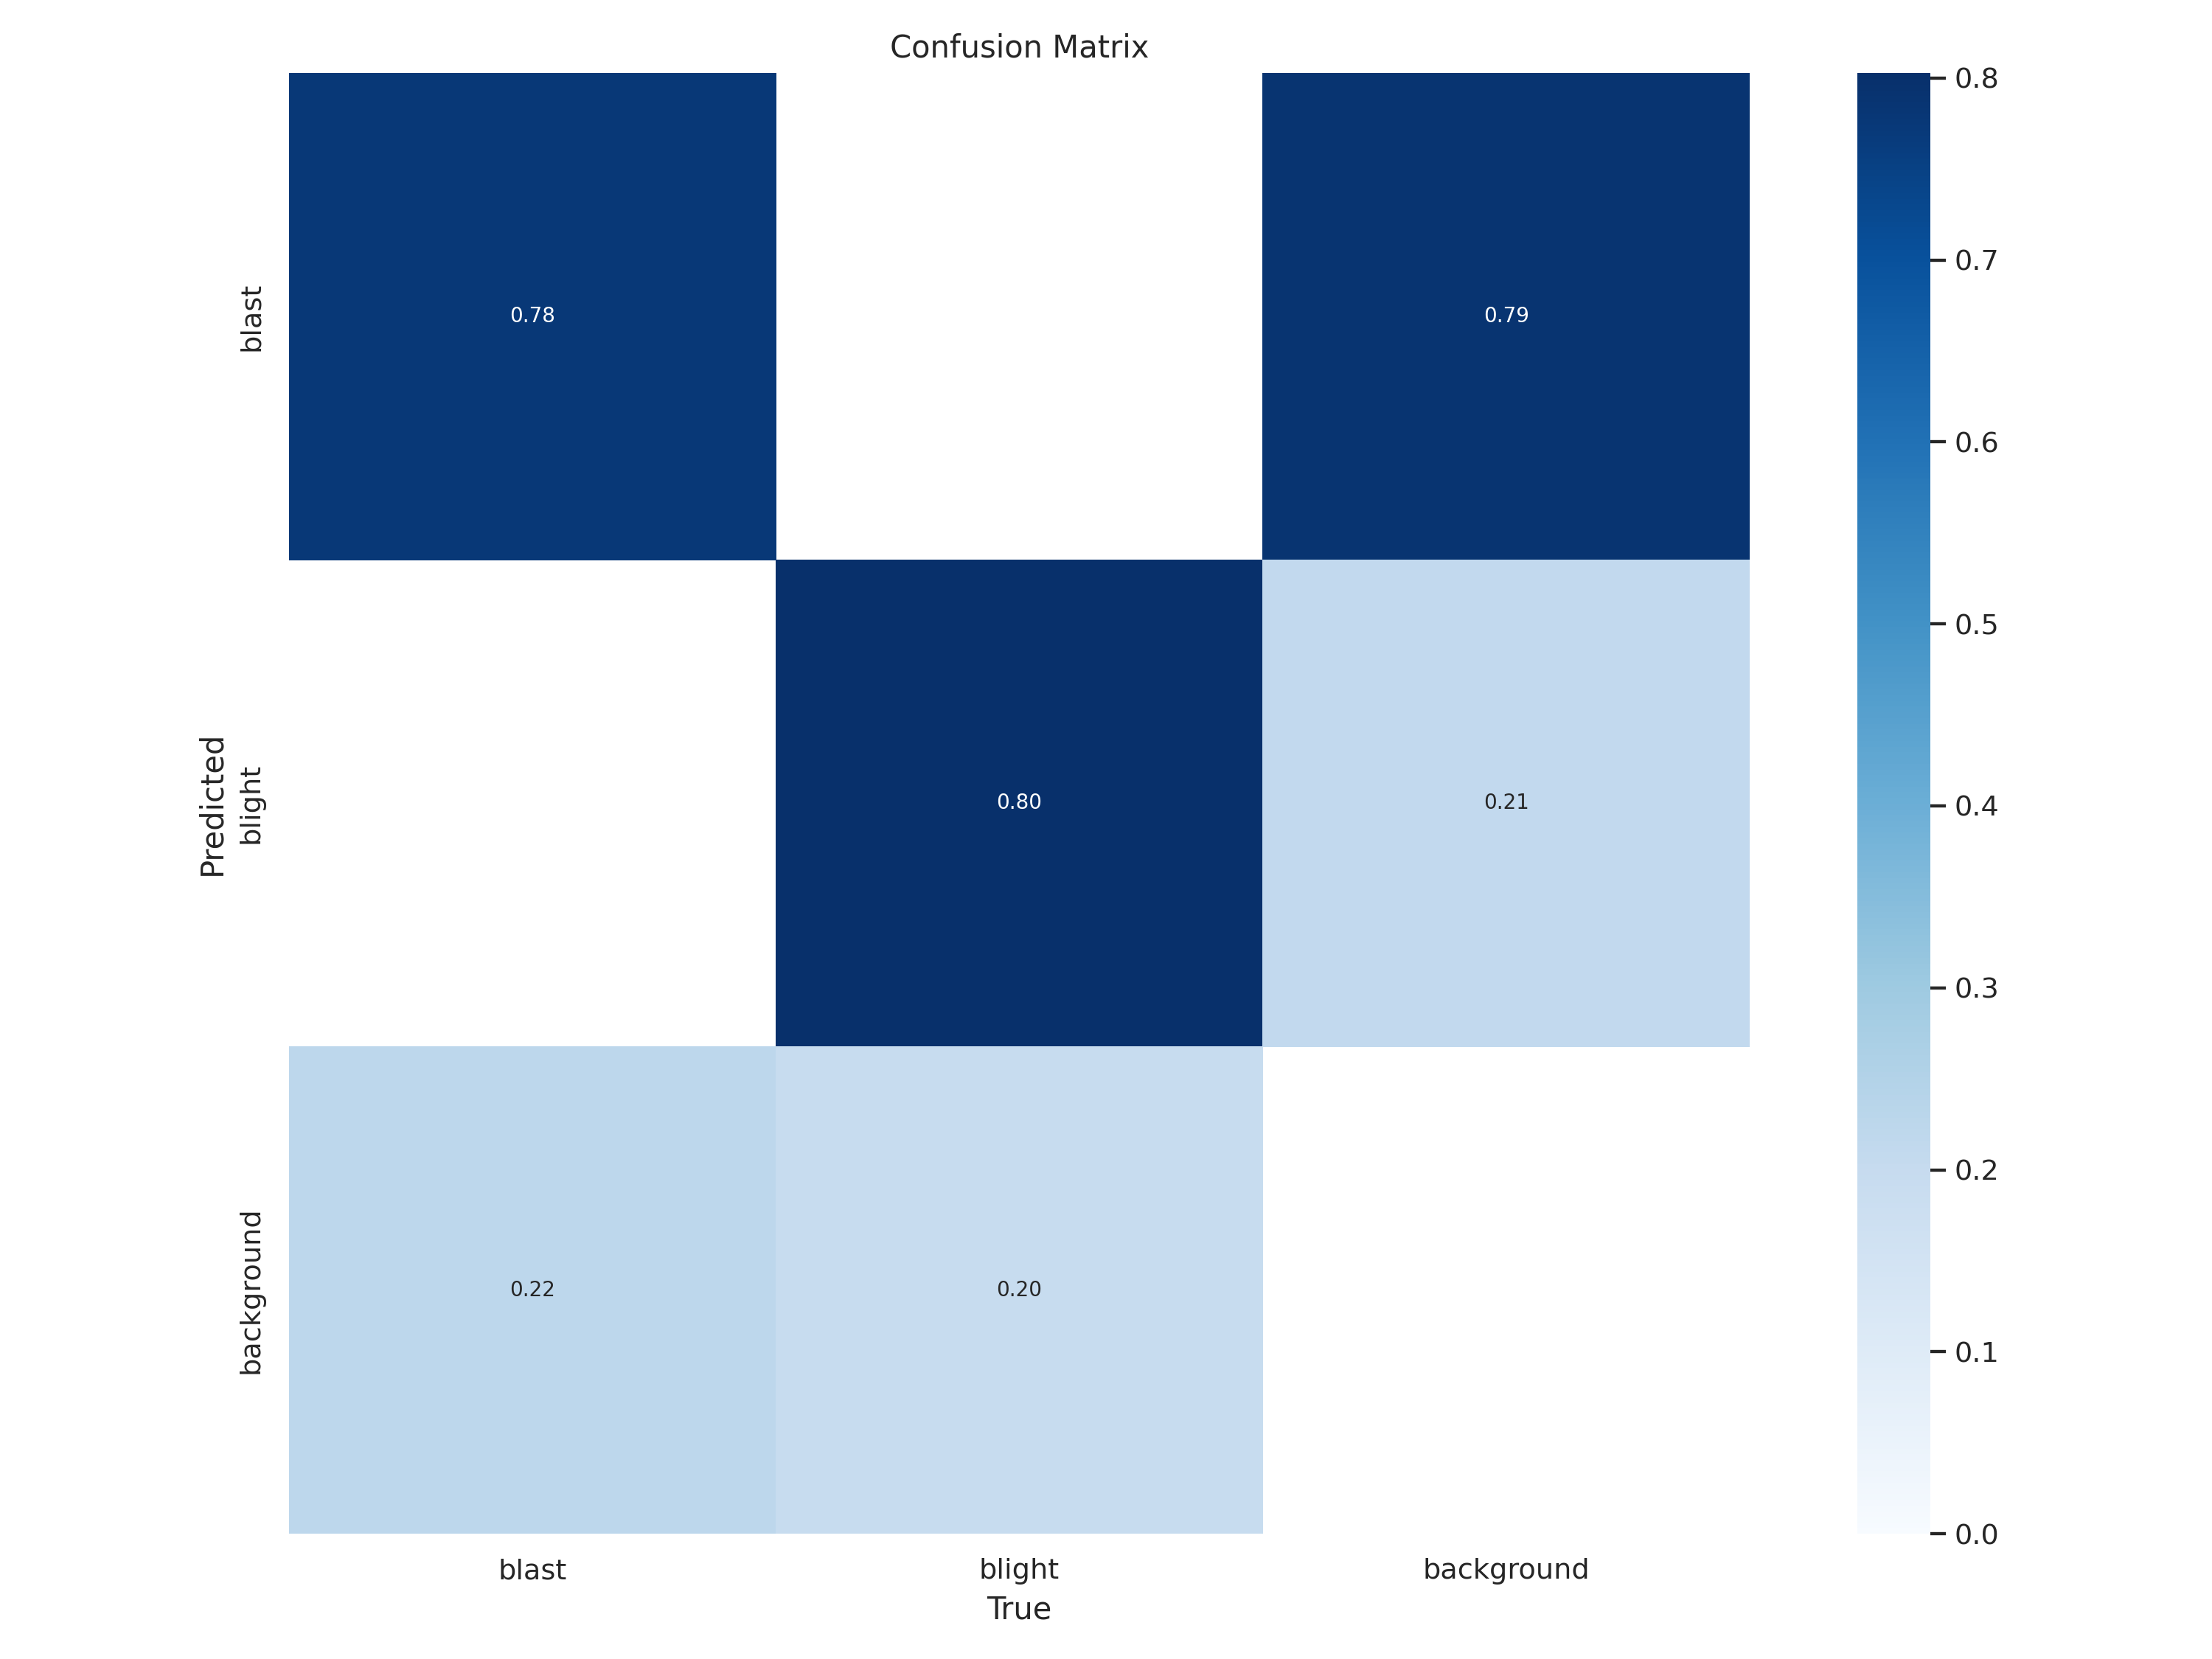

In [95]:
from IPython.display import Image

Image('/content/runs/detect/train2/confusion_matrix.png')

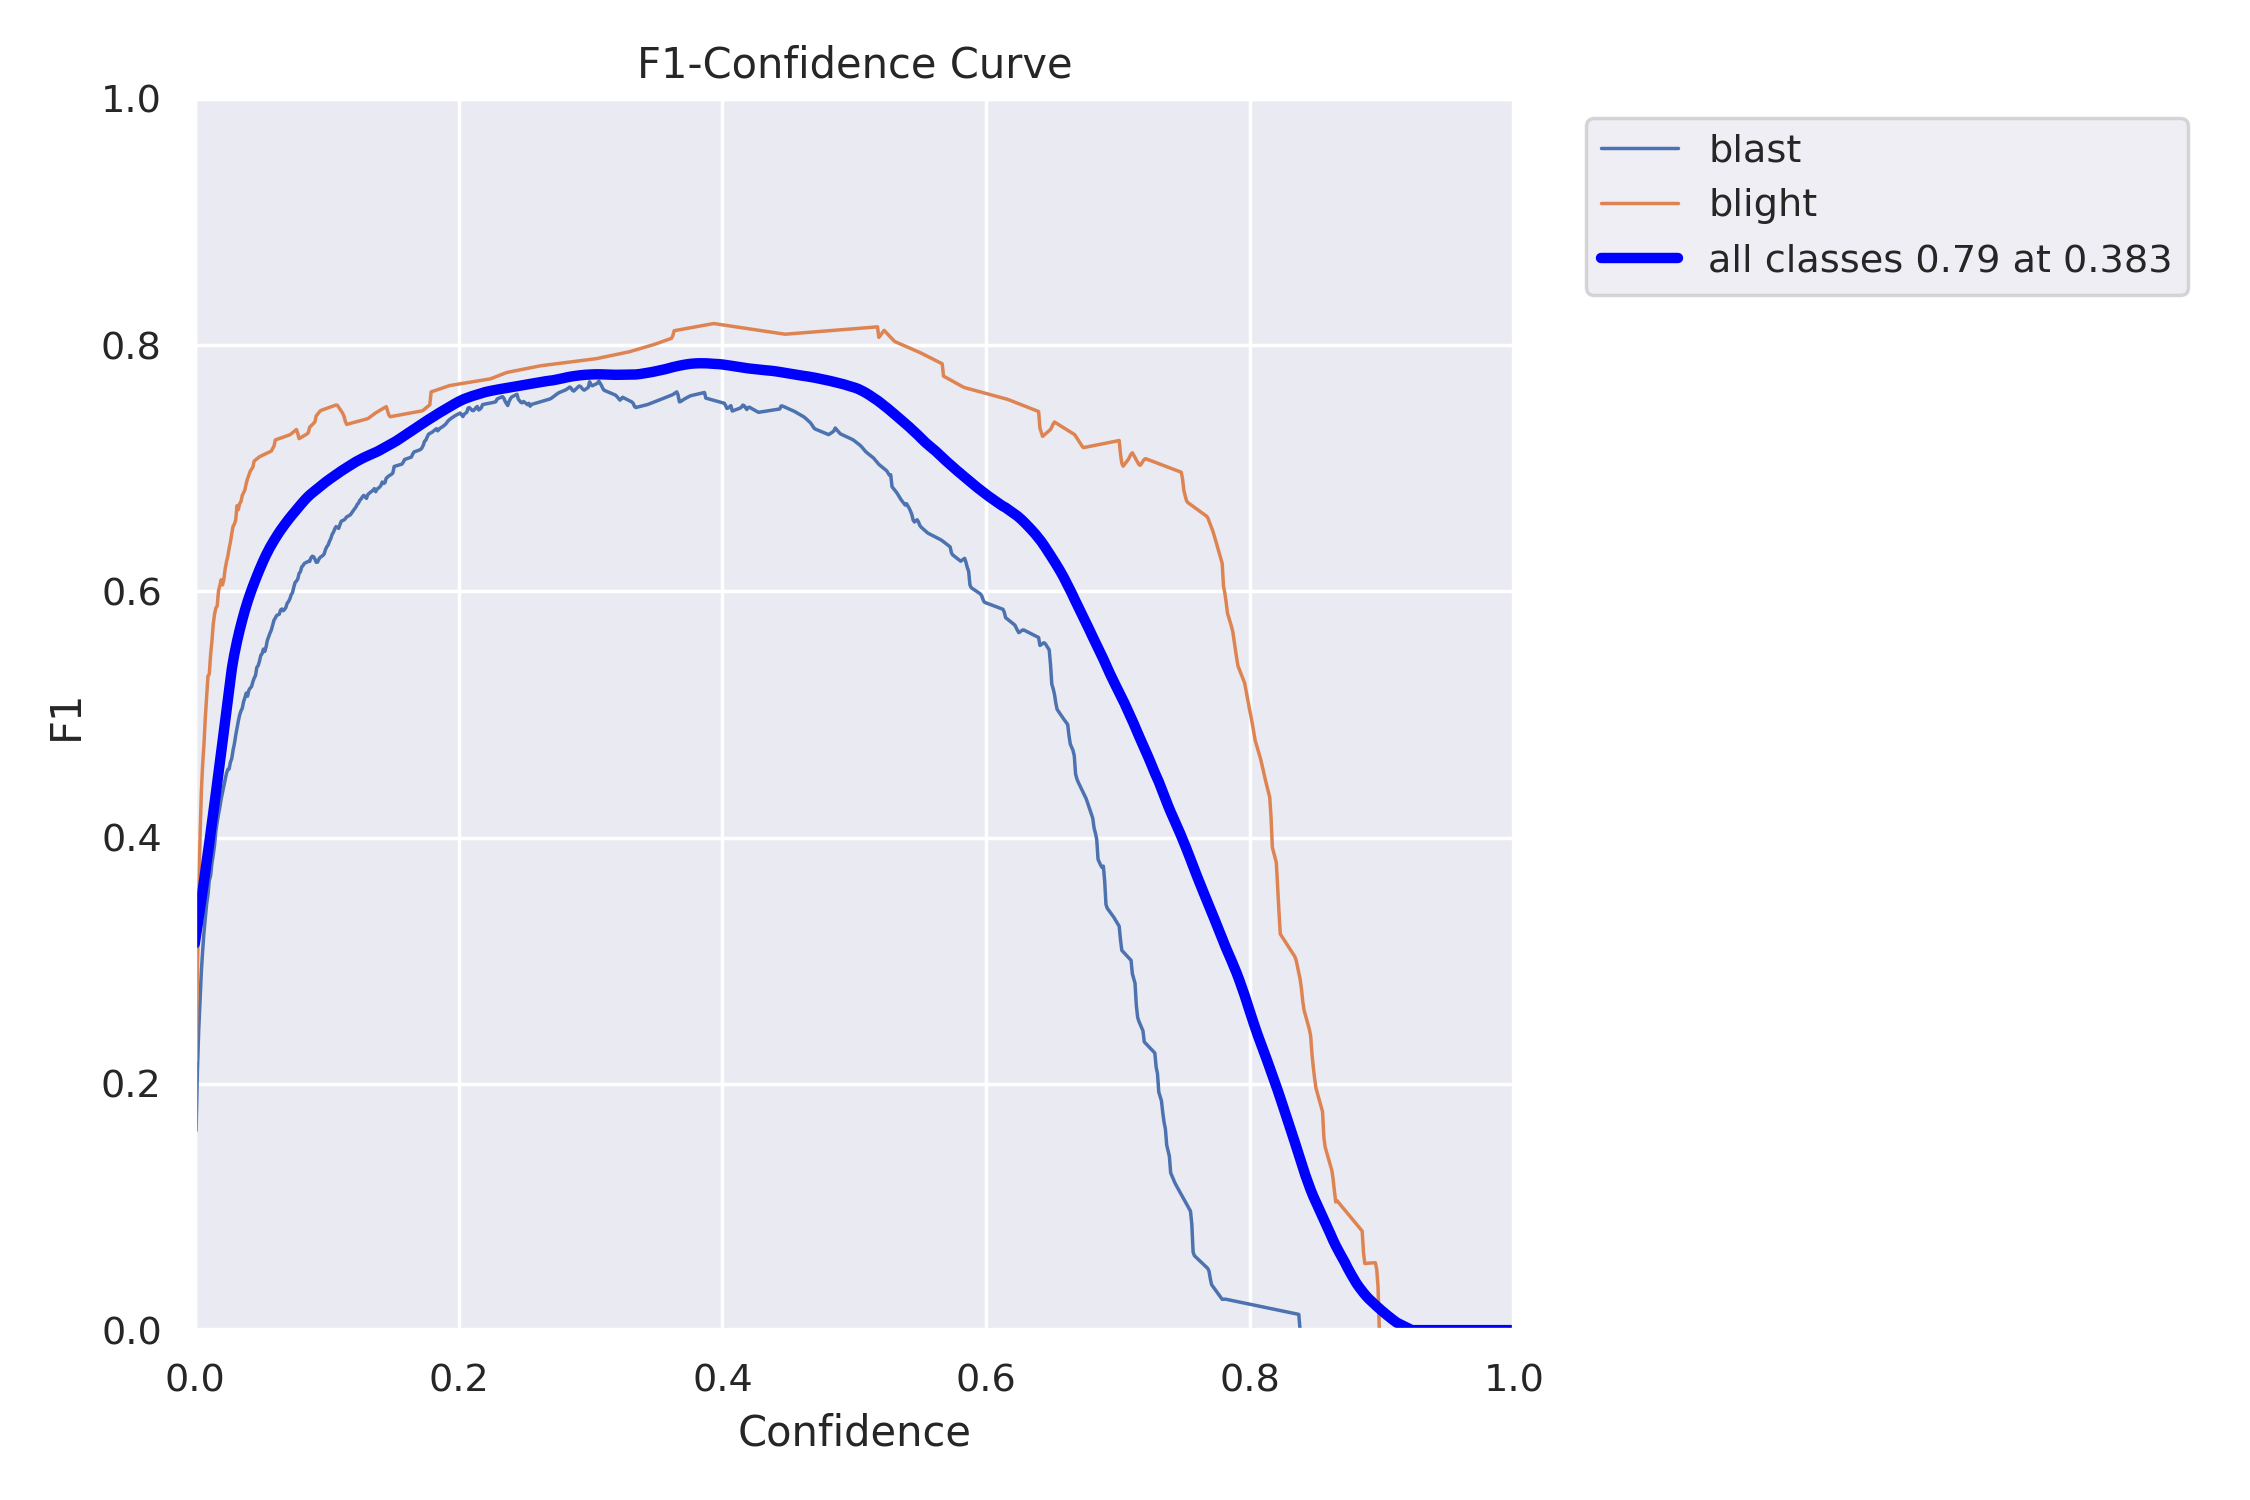

In [96]:
Image('/content/runs/detect/train2/F1_curve.png')

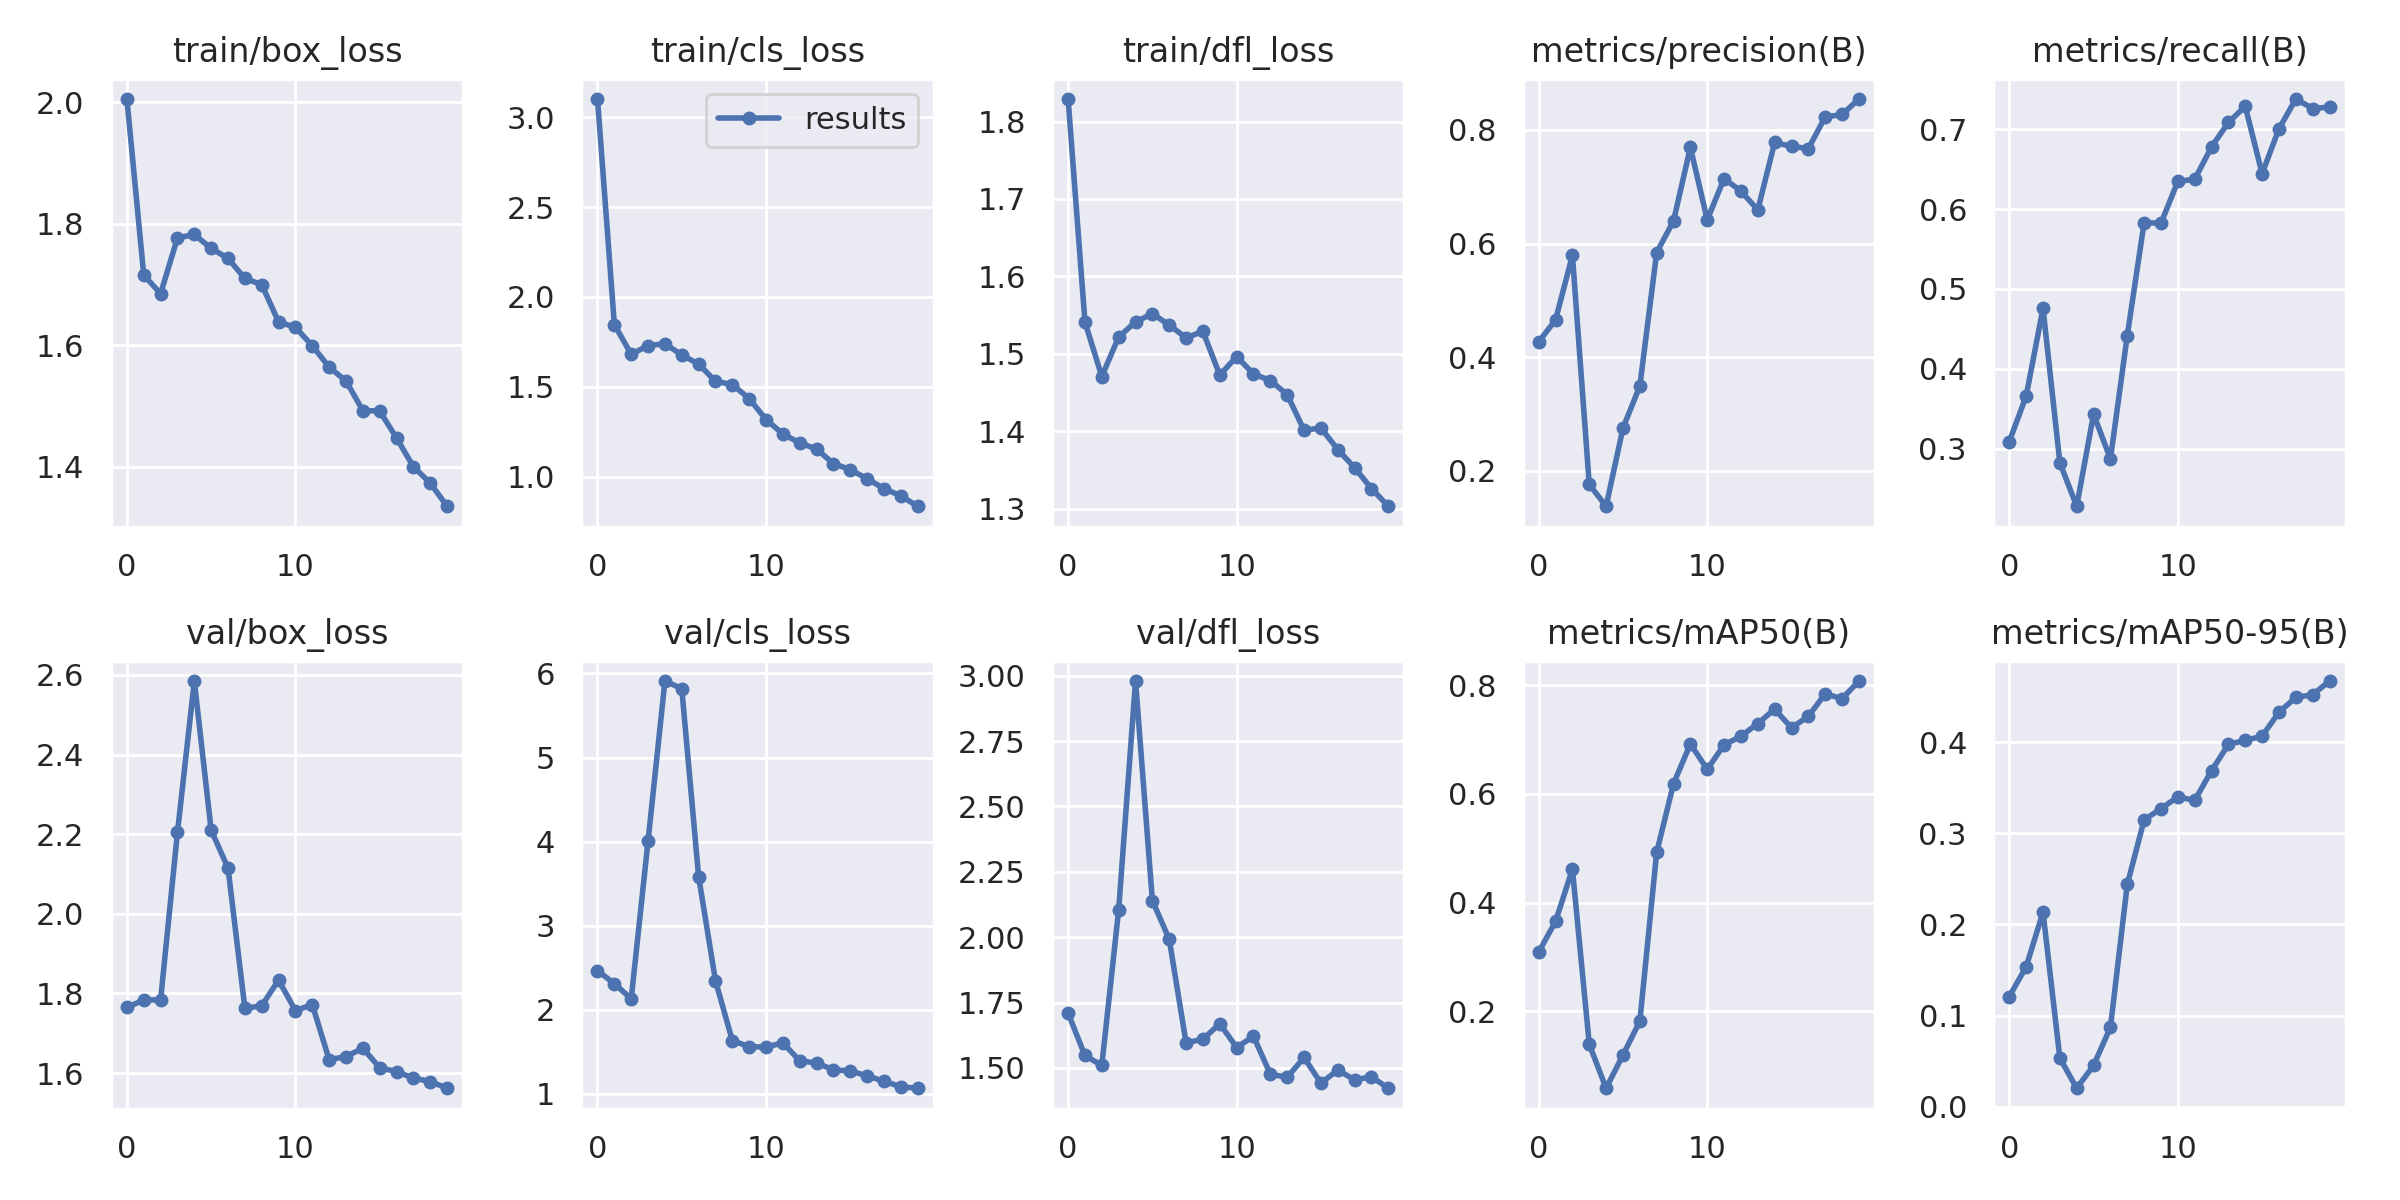

In [97]:
Image('/content/runs/detect/train2/results.png')

# Validate with new model


Using Python
```
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a custom model

# Validate the model
results = model.val()
```



In [9]:
!yolo task=detect \
    mode=val \
    model=/content/runs/detect/train/weights/best.pt \
    data=/content/datasets/data.yaml


Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/valid/labels.cache... 177 images, 11 backgrounds, 0 corrupt: 100% 177/177 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:04<00:00,  2.75it/s]
                   all        177        228      0.714      0.688      0.761      0.382
                 blast        177        157      0.782      0.686      0.787      0.384
                blight        177         71      0.647       0.69      0.735      0.379
Speed: 1.1ms pre-process, 9.6ms inference, 0.0ms loss, 2.3ms post-process per image


# Predict with custom model


Using CLI

```
from ultralytics import YOLO

# Load a model
model = YOLO("=/content/runs/detect/train/weights/best.pt")  # load a custom model

# Predict with the model
results = model("/content/datasets/test/images/Blast_1043_jpg.rf.ea5f4149790d924ff916ed7e8ec0a9e8.jpg")  # predict on an image
```



In [11]:
!yolo task=detect \
    mode=predict \
    model=/content/runs/detect/train/weights/best.pt \
    conf=0.4 \
    source=/content/datasets/test/images \
    imgsz=416


Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/92 /content/datasets/test/images/Blast_1043_jpg.rf.ea5f4149790d924ff916ed7e8ec0a9e8.jpg: 416x416 1 blast, 10.7ms
image 2/92 /content/datasets/test/images/Blast_1057_jpg.rf.36f23153ad05ad2fda3f8247c0e6658d.jpg: 416x416 1 blast, 10.7ms
image 3/92 /content/datasets/test/images/Blast_1063_jpg.rf.52eca22247ddf9e28f886c94389fb54b.jpg: 416x416 10.7ms
image 4/92 /content/datasets/test/images/Blast_1100_jpg.rf.bae2cb1acff983b75d0895217aab8190.jpg: 416x416 1 blast, 10.7ms
image 5/92 /content/datasets/test/images/Blast_1133_jpg.rf.a10767f74e4a5635e87829dc6d6b80a1.jpg: 416x416 10.7ms
image 6/92 /content/datasets/test/images/Blast_113_jpg.rf.e064ca8dffb5b91a4a5c1402891c0d7d.jpg: 416x416 2 blasts, 10.7ms
image 7/92 /content/datasets/test/images/Blast_1141_jpg.rf.9727bef76d3c85f75fa081a0e94f246c.jpg: 416x416 10.7ms
image 8/9

# Export model 


Using CLI
```
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")  # load a custom trained

# Export the model
model.export(format="onnx", imgsz=416)
```



In [14]:
!yolo task=detect \
    mode=export \
    model=/content/runs/detect/train/weights/best.pt \
    imgsz=416 \
    format=onnx  # export custom trained model

{'task': 'detect', 'mode': 'export', 'model': '/content/runs/detect/train/weights/best.pt', 'data': None, 'epochs': 100, 'patience': 50, 'batch': 16, 'imgsz': 416, 'save': True, 'cache': False, 'device': None, 'workers': 8, 'project': None, 'name': None, 'exist_ok': False, 'pretrained': False, 'optimizer': 'SGD', 'verbose': False, 'seed': 0, 'deterministic': True, 'single_cls': False, 'image_weights': False, 'rect': False, 'cos_lr': False, 'close_mosaic': 10, 'resume': False, 'overlap_mask': True, 'mask_ratio': 4, 'dropout': 0.0, 'val': True, 'save_json': False, 'save_hybrid': False, 'conf': None, 'iou': 0.7, 'max_det': 300, 'half': False, 'dnn': False, 'plots': True, 'source': None, 'show': False, 'save_txt': False, 'save_conf': False, 'save_crop': False, 'hide_labels': False, 'hide_conf': False, 'vid_stride': 1, 'line_thickness': 3, 'visualize': False, 'augment': False, 'agnostic_nms': False, 'retina_masks': False, 'format': 'onnx', 'keras': False, 'optimize': False, 'int8': False, '

In [15]:
!yolo task=detect \
    mode=predict \
    model=/content/runs/detect/train/weights/best.onnx \
    conf=0.4 \
    source=/content/datasets/test/images \
    imgsz=416

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Loading /content/runs/detect/train/weights/best.onnx for ONNX Runtime inference...
image 1/92 /content/datasets/test/images/Blast_1043_jpg.rf.ea5f4149790d924ff916ed7e8ec0a9e8.jpg: 416x416 1 blast, 11.9ms
image 2/92 /content/datasets/test/images/Blast_1057_jpg.rf.36f23153ad05ad2fda3f8247c0e6658d.jpg: 416x416 1 blast, 12.1ms
image 3/92 /content/datasets/test/images/Blast_1063_jpg.rf.52eca22247ddf9e28f886c94389fb54b.jpg: 416x416 11.8ms
image 4/92 /content/datasets/test/images/Blast_1100_jpg.rf.bae2cb1acff983b75d0895217aab8190.jpg: 416x416 1 blast, 8.9ms
image 5/92 /content/datasets/test/images/Blast_1133_jpg.rf.a10767f74e4a5635e87829dc6d6b80a1.jpg: 416x416 8.4ms
image 6/92 /content/datasets/test/images/Blast_113_jpg.rf.e064ca8dffb5b91a4a5c1402891c0d7d.jpg: 416x416 2 blasts, 8.5ms
image 7/92 /content/datasets/test/images/Blast_1141_jpg.rf.9727bef76d3c85f75fa081a0e94f246c.jpg: 416x416 8.5ms
image 8/92 /co

# Interface Python

Ultralytics YOLOv8.0.11 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing... 
Model summary: 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


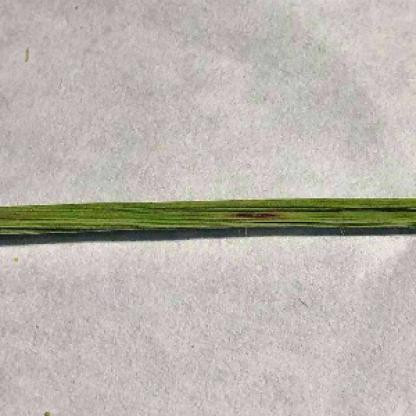

In [109]:
import cv2
from PIL import Image
from ultralytics import YOLO

model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLO(model_path)  # load a custom trained

image = cv2.imread('/content/datasets/test/images/Blast_1063_jpg.rf.52eca22247ddf9e28f886c94389fb54b.jpg')
result = model.predict(image, conf=0.3)[0]

Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [110]:
# get bbox xyxy
boxes = result.boxes.xyxy.to('cpu').numpy().astype(int) 

In [111]:
# get confidence level
confidences = result.boxes.conf.to('cpu').numpy().astype(float) 

In [112]:
# get label
labels = result.boxes.cls.to('cpu').numpy().astype(int) 

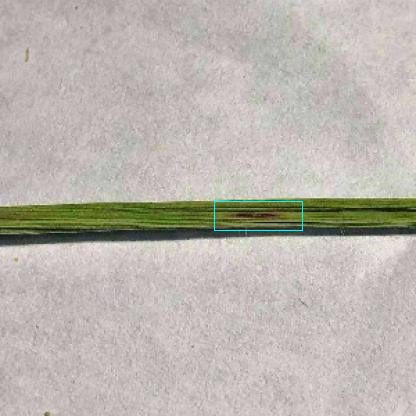

In [113]:
for box, conf, label in zip(boxes, confidences, labels):
    x_min, y_min, x_max, y_max = box
    image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255,255,0), 1) #image[y_min:y_max, x_min:x_max]

Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))